# Exploratory Data Analysis (EDA): NO₂ Pollution in Madrid
In this notebook, we analyze the temporal evolution of NO₂ levels in Madrid using data from the Open-Meteo API. 

We'll explore:
- Daily, weekly, and monthly trends
- Seasonality and anomalies
- Correlations with other pollutants or meteorological factors


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Plot settings
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

## Load and inspect data

We load the processed dataset produced after extraction and transformation. It contains a timestamp column and NO₂ concentration values.


In [43]:
df = pd.read_parquet('../data/merged_recent_pollution_weather.parquet')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

df.head()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,temperature_2m,wind_speed_10m
time,,,,,,,
2025-05-15 00:00:00,14.2,12.1,165.0,31.7,53.0,13.1,3.1
2025-05-15 01:00:00,12.0,10.5,151.0,24.0,51.0,12.8,2.5
2025-05-15 02:00:00,10.8,9.0,140.0,18.7,49.0,12.6,2.5
2025-05-15 03:00:00,9.5,8.2,130.0,14.5,47.0,12.2,3.2
2025-05-15 04:00:00,8.7,7.4,128.0,11.1,47.0,11.8,2.7


## Data overview

Let's check basic info, missing values, and descriptive statistics.


In [44]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2025-05-15 00:00:00 to 2025-05-15 23:00:00
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm10              24 non-null     float64
 1   pm2_5             24 non-null     float64
 2   carbon_monoxide   24 non-null     float64
 3   nitrogen_dioxide  24 non-null     float64
 4   ozone             24 non-null     float64
 5   temperature_2m    24 non-null     float64
 6   wind_speed_10m    24 non-null     float64
dtypes: float64(7)
memory usage: 1.5 KB


pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
ozone               0
temperature_2m      0
wind_speed_10m      0
dtype: int64

## Time series of pollutants

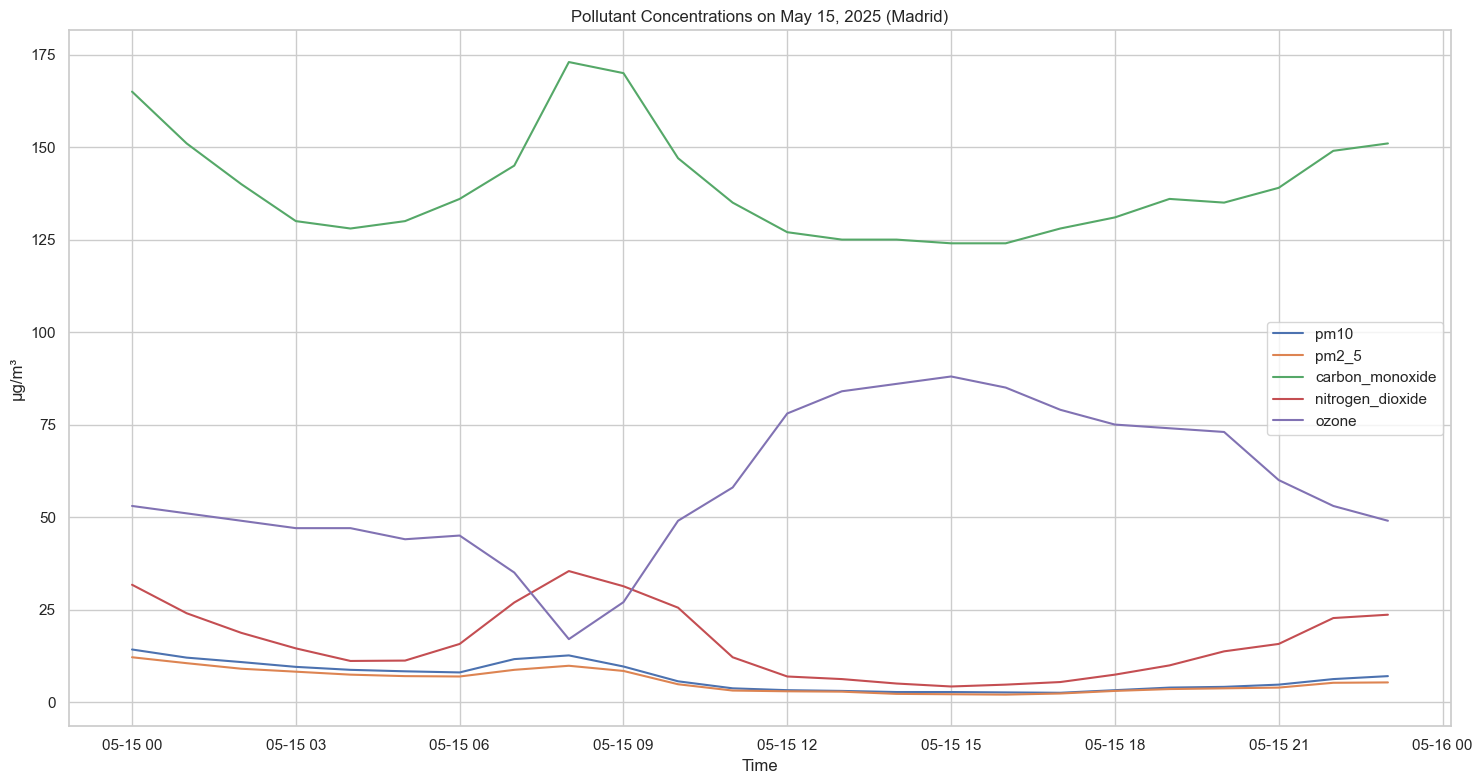

In [45]:
pollutants = ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'ozone']

plt.figure(figsize=(15, 8))
for pollutant in pollutants:
    plt.plot(df.index, df[pollutant], label=pollutant)

plt.title('Pollutant Concentrations on May 15, 2025 (Madrid)')
plt.xlabel('Time')
plt.ylabel('µg/m³')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
df.describe()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,temperature_2m,wind_speed_10m
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6.683333,5.616667,139.333333,15.979167,58.583333,14.675000,5.529167
std,3.719825,3.051395,14.421200,9.555830,19.577975,2.591332,3.256896
min,2.500000,2.000000,124.000000,4.200000,17.000000,10.900000,2.100000
25%,3.200000,2.975000,128.000000,7.275000,47.000000,12.350000,2.675000
50%,5.900000,5.000000,135.500000,14.100000,53.000000,14.950000,3.950000
75%,9.525000,8.250000,147.500000,23.700000,75.750000,17.050000,8.850000
max,14.200000,12.100000,173.000000,35.400000,88.000000,18.400000,11.300000


## Hourly patterns with subplots

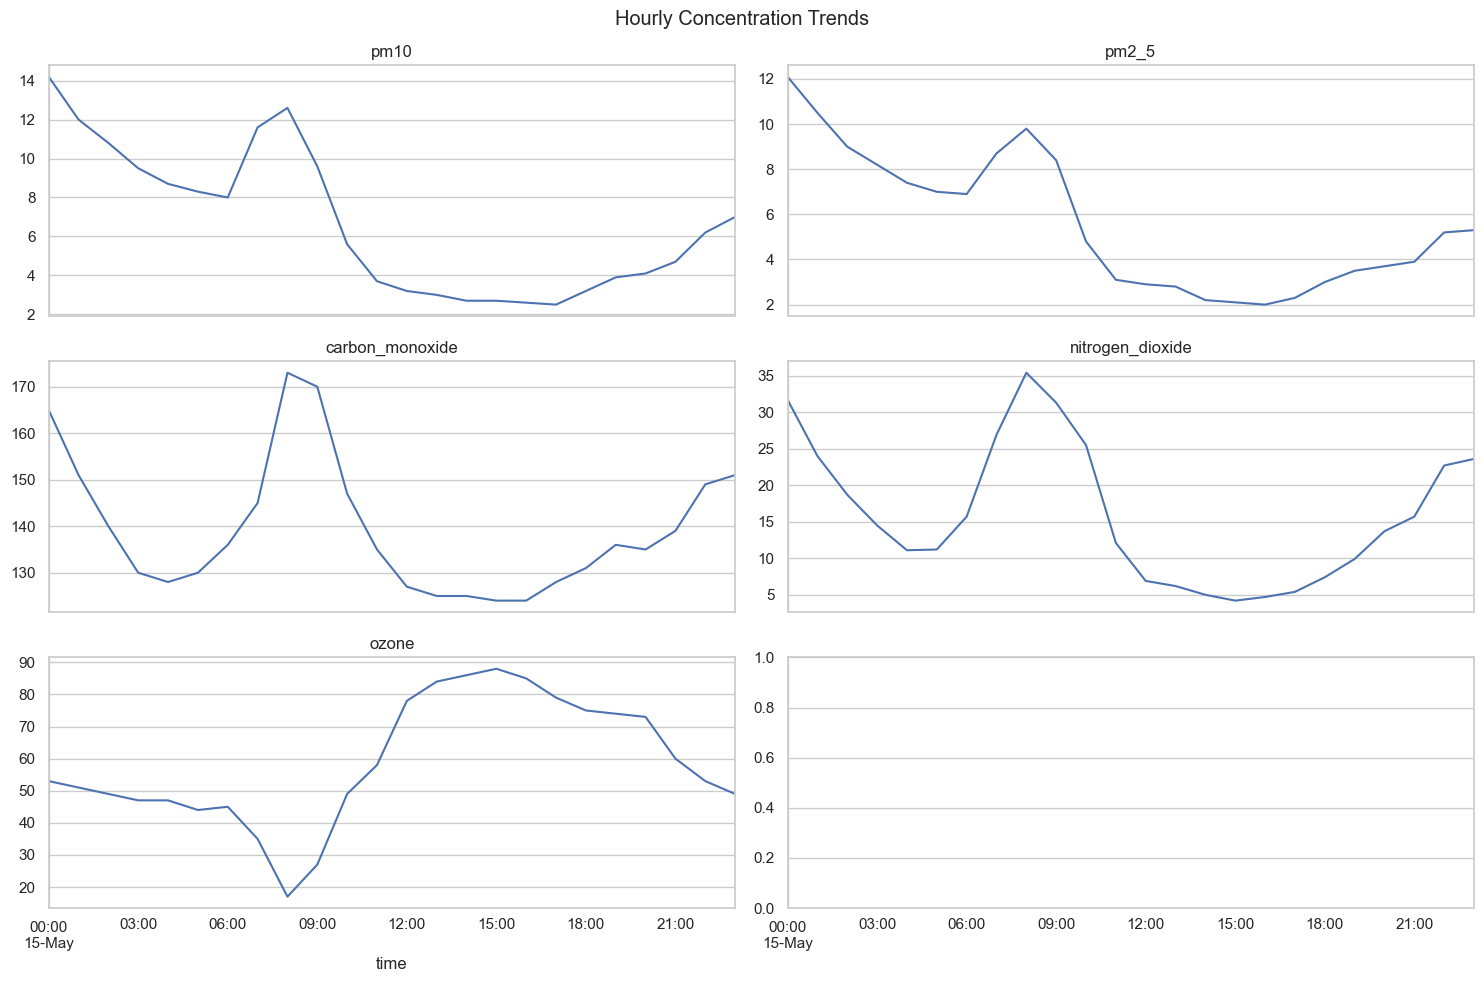

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharex=True)
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    df[pollutant].plot(ax=axes[i], title=pollutant)

plt.suptitle("Hourly Concentration Trends")
plt.tight_layout()
plt.show()


## Correlation Matrix

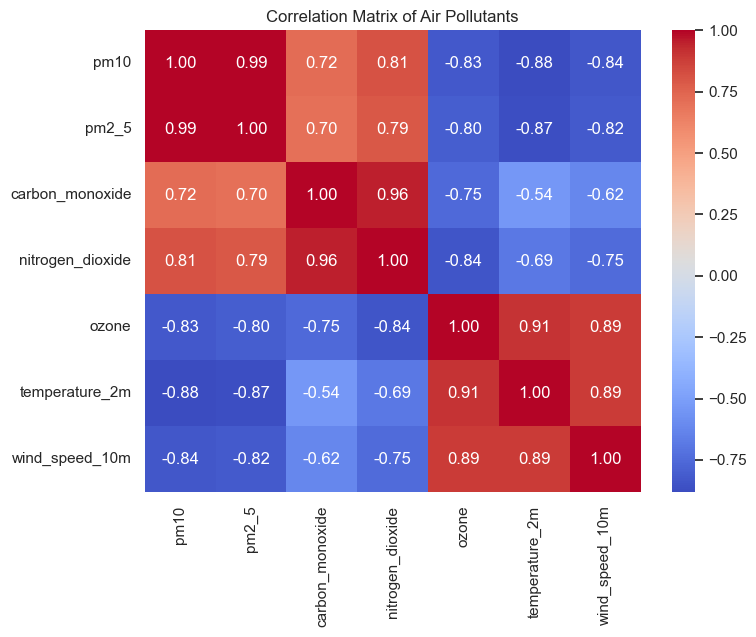

In [49]:
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Air Pollutants")
plt.show()


Next steps: 
Fix temperature/wind issue:

    Confirm your weather API call covers the same hour range.

    Ensure timezone is consistent (Europe/Madrid, not UTC).

Expand from 1 day to 3–5 once it works.

Merge again with weather.

Add:

    Scatter plots (e.g., NO₂ vs temperature)

    Boxplots by hour (df["hour"] = df.index.hour)

    Seasonal decomposition once there's enough data

## Daily NO₂ levels

We compute the daily average of NO₂ and visualize it.


## Weekly & Monthly NO₂ Trends

We smooth the data using weekly and monthly averages to spot longer-term patterns.
